In [1]:
library(tidyverse)
library(cowplot)

# Custom package
library(rutils)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [23]:
text_size <- 8
label_text_size <- 8
small_text_size <- 8
family <- "ArialMT"
dpi <- 320
ht <- 5
wd <- 4

In [4]:
pcaplot_figs <- c(load(paste0(dirs$figures_dir, "/saved_obj/pcaplots.RData")))

In [5]:
pcaplot_figs

[1] "screeplot"           "small_multplot"      "pc1_pc2_scatterplot"
[4] "pc2_pc3_scatterplot"

In [6]:
set_margins <- function(plt, margins = c(0, 0, 0, 0)) {
    plt + theme(plot.margin = unit(margins, "cm"))
}

hide_legend <- function(plt) {
    plt + theme(legend.position="none")
}

hide_axis_title <- function(plt, axis = "x") {
    if (axis == "x") {
        plt <- plt + theme(axis.title.x = element_blank())
    }
    else if (axis == "y") {
        plt <- plt + theme(axis.title.y = element_blank())
    }
    plt
}

rename_axis_title <- function(plt, axis = "x", n_title = "") {
    if (axis == "x") {
        plt <- plt + labs(x = n_title)
    }
    else if (axis == "y") {
        plt <- plt + labs(y = n_title)
    }
    plt
}

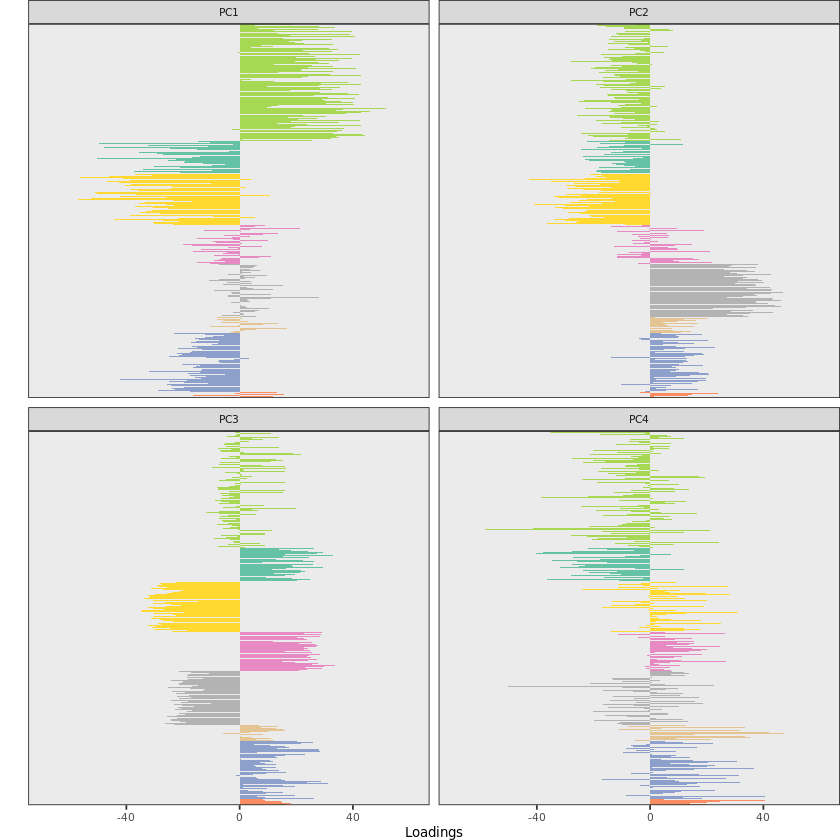

In [19]:
pcaplot_list <- c(
    mget("small_multplot") %>%
        purrr::map(function(p) { set_margins(p, c(0, 0, 0, 0.5)) })
) 

sm_grid <- plot_grid(
    pcaplot_list[[1]],
    ncol = 1,
    label_fontfamily = family,
    label_size = label_text_size,
    label_fontface = "bold"
)
sm_grid

In [20]:
ctype_legend <- get_legend(small_multplot + theme(legend.position = "right", plot.margin = unit(c(0, 0, 0, 0), "cm")))
legend_grid <- plot_grid(ctype_legend, NULL, nrow = 2)

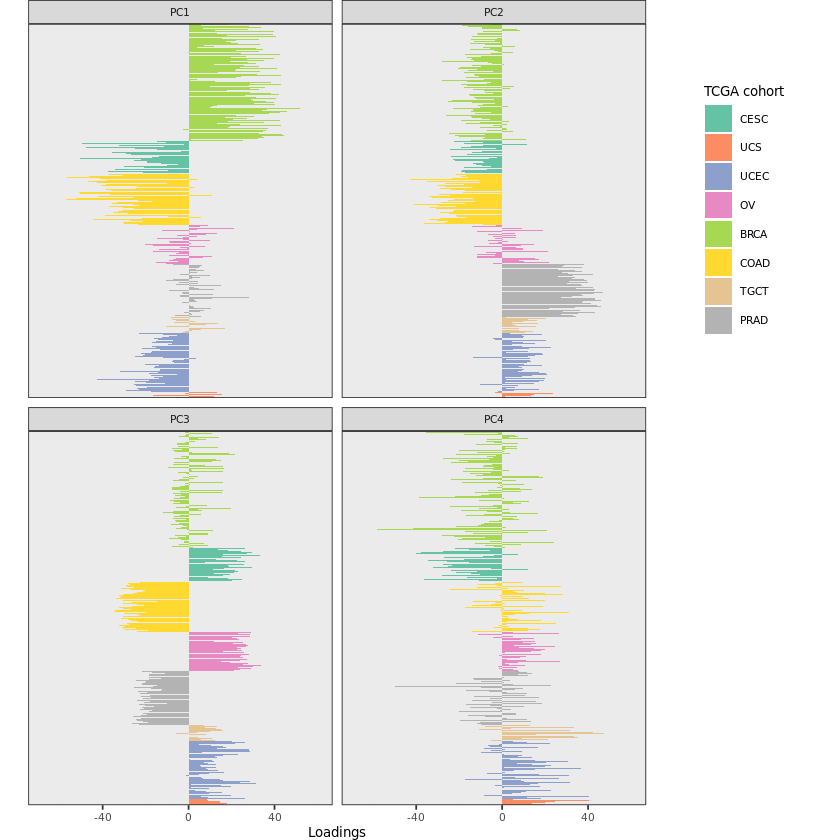

In [28]:
figS1 <- plot_grid(
    sm_grid,
    legend_grid,
    ncol = 2,
    rel_widths = c(1, 0.3)
)
figS1

In [29]:
ggsave(figS1, filename = paste0(dirs$figures_dir, "/paneled/figureS1.png"), dpi = dpi, height = ht, width = wd)